# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('file4.csv')
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [3]:
filtered_df = df[(df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]

print("Filtered DataFrame:")
display(filtered_df)

Filtered DataFrame:


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
189,OK31456,California,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A,1
236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,2011-01-24,Employed,F,51643,...,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A,1
419,GW43195,Oregon,25807.063000,Yes,Extended,College,2011-02-13,Employed,F,71210,...,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A,2
442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2011-02-13,Disabled,F,16181,...,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A,2
587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,0,...,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,FN44127,Oregon,3508.569533,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,A,1
10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2011-02-08,Employed,M,55687,...,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury SUV,Medsize,A,2
10487,IX60941,Oregon,3508.569533,Yes,Extended,College,2011-01-05,Medical Leave,M,20978,...,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,A,1
10565,QO62792,Oregon,7840.165778,Yes,Extended,College,2011-01-14,Employed,M,58414,...,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,Four-Door Car,Medsize,A,1


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [4]:
filtered_df = df[df['response'] == 'Yes']
grouped_df = filtered_df.groupby(['policy_type','gender']).agg({'total_claim_amount':'mean'}).reset_index()
grouped_df = grouped_df.rename(columns = {'total_claim_amount':'average_total_claim_amount'})
display(grouped_df)

,policy_type,gender,average_total_claim_amount
0,Corporate Auto,F,433.738499
1,Corporate Auto,M,408.582459
2,Personal Auto,F,452.965929
3,Personal Auto,M,457.010178
4,Special Auto,F,453.280164
5,Special Auto,M,429.527942


The difference between the mean values of total claim amounts across the data subset is insignificant, which makes it difficult to assume correlation between policy type and gender

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [5]:
# Get the unique values of 'state'
unique_states = df['state'].nunique()
print(unique_states)


5


In [6]:
filtered_customers = df[df['number_of_policies'] >= 5]

# Step 2: Count the number of customers for each state
customer_counts_by_state = filtered_customers['state'].value_counts()

# Step 3: Filter states where there are more than 500 customers
states_with_more_than_500_customers = customer_counts_by_state[customer_counts_by_state > 500].index

# Step 4: Filter the original DataFrame based on the selected states
final_result = filtered_customers[filtered_customers['state'].isin(states_with_more_than_500_customers)]

display(final_result)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
20,OM80593,California,7247.313475,No,Basic,Bachelor,2011-02-23,Unemployed,F,0,...,7,Personal Auto,Personal L3,Offer1,Call Center,499.200000,SUV,Medsize,A,2
22,EQ62488,Oregon,15031.564500,No,Basic,College,2011-01-15,Employed,F,59456,...,8,Personal Auto,Personal L3,Offer2,Call Center,907.200000,Luxury Car,Large,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895,EG40670,California,6232.687923,No,Extended,Bachelor,2011-01-08,Disabled,F,28334,...,7,Special Auto,Special L3,Offer1,Agent,537.765151,Four-Door Car,Medsize,A,1
10898,SO95845,California,5807.659307,No,Basic,College,2011-01-07,Employed,F,62447,...,7,Personal Auto,Personal L3,Offer4,Call Center,133.977857,Two-Door Car,Medsize,A,1
10899,WU60905,California,8610.667489,No,Basic,High School or Below,2011-02-06,Unemployed,F,0,...,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [8]:
filtered_customers = df.groupby('customer')['state'].nunique()
filtered_customers = filtered_customers[filtered_customers == unique_states].index

# Filter the original DataFrame based on the selected customers
result_df = df[df['customer'].isin(filtered_customers)]

print(result_df)

Empty DataFrame
Columns: [customer, state, customer_lifetime_value, response, coverage, education, effective_to_date, employmentstatus, gender, income, location_code, marital_status, monthly_premium_auto, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies, policy_type, policy, renew_offer_type, sales_channel, total_claim_amount, vehicle_class, vehicle_size, vehicle_type, month]
Index: []

[0 rows x 26 columns]


Second solution of 3.

In [ ]:
customer_counts = df['customer'].value_counts()

# Filter customers with counts greater than or equal to 5
filtered_customers = customer_counts[customer_counts >= 5].index

# Filter the original DataFrame based on the selected customers
result_df = df[df['customer'].isin(filtered_customers)]
result_df = result_df.sort_values(by='customer', ascending=False)
display(result_df)

There are no customers who have policies in each state

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [ ]:
result_df = df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median']).reset_index()

display(result_df)

Across all education levels, females generally have higher maximum customer lifetime values compared to males.  However, the minimum and median values do not consistently follow this pattern, indicating variability in customer lifetime values.
    The highest maximum customer lifetime values are generally associated with the "Bachelor" and "College" education levels for both gend
    The "High School or Below" education level exhibits the highest maximum value for males, but not for fem.
    Customer lifetime values tend to vary across different educational levels, suggesting a potential correlation between education and spending behes:

    The range between the maximum and minimum values is substantial for each category, indicating a diverse range of customer behaviors and values within egroup.
    The range is particularly wide for the "High School or Below" education level, especiall  This can indicate the possibility of outliers or extreme values affecting the overall statistics.y Values:

    The median values provide insights into the central tendency of customer lifetime values witeach group.
    For some groups, such as females with a "Doctor" degree, the median is relatively lower compared to the maximum value, indicating potential outliers or skewel Influence:

    Customer lifetime values do not strictly follow a linear pattern with education level. For instance, while "Doctor" level customers generally have lower maximum values, they might have higher median values compared to otg the overall statistics.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [ ]:
policies_by_state_and_month = df.pivot_table(values='number_of_policies', index='state', columns='month', aggfunc='sum', fill_value=0)

display(policies_by_state_and_month)

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [ ]:
grouped_data = df.groupby(['state', 'month'])['number_of_policies'].count().reset_index()
sorted_data = grouped_data.sort_values(by='number_of_policies', ascending=False)

# Select the top 3 states with the highest number of policies sold
top_states = sorted_data['state'].unique()[:3]

# Create a new DataFrame for the top 3 states
top_states_df = grouped_data[grouped_data['state'].isin(top_states)]

display(top_states_df)

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [ ]:
#unpivot the data using melt
melted_df = pd.melt(df, id_vars=['sales_channel'], value_vars=['response'])

#filter the data for 'response' equal to 'Yes'
filtered_df = melted_df[melted_df['value'] == 'Yes']

#calculate response rate using pivot_table
response_rate_table = pd.pivot_table(filtered_df, index='sales_channel', values='value', aggfunc='count', fill_value=0).reset_index()

#rename the column to 'response_rate'
response_rate_table = response_rate_table.rename(columns={'value': 'response_yes'})

display(response_rate_table)


 Show DataFrame info.  Describe DataFrame   Show a plot of the total number of response    Show a plot of the response rate by the sales chann
    Show a plot of the response rate by the total claim amo
    Show a plot of the response rate by income.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [14]:
#Show DataFrame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [15]:
#Describe DataFrame.
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


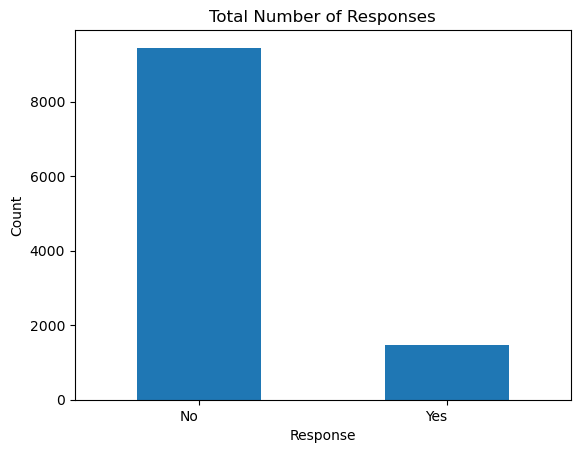

In [31]:
#Show a plot of the total number of responses
# Step 1: Count the responses
response_counts = df['response'].value_counts()

# Step 2: Plot the bar chart
plot = response_counts.plot(kind='bar')

# Step 3: Customize the plot
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.show()

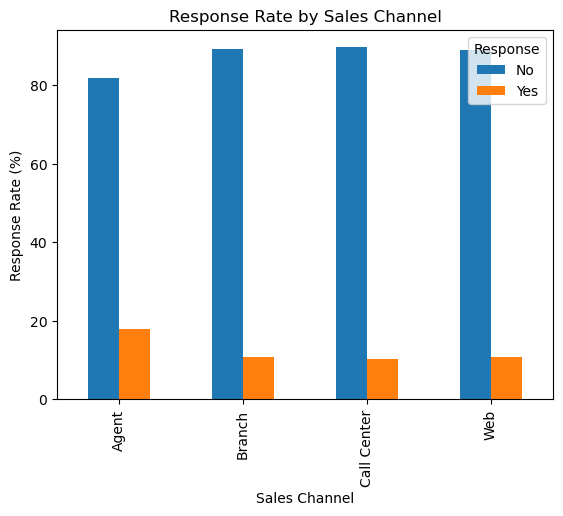

In [43]:
# Plot the response rate
response_rate_data = df.groupby('sales_channel')['response'].value_counts(normalize=True).unstack() * 100
response_rate_data.plot(kind='bar')

# Customize the plot
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate (%)')
plt.legend(title='Response')

# Display the plot
plt.show()

In [53]:
#Show a plot of the response rate by the total claim amount.

# Calculate the mean value of 'total_claim_amount' based on '_response'
mean_values = df.groupby('response')['total_claim_amount'].mean()

# Display the result
print(mean_values)

response
No     432.998667
Yes    447.061570
Name: total_claim_amount, dtype: float64


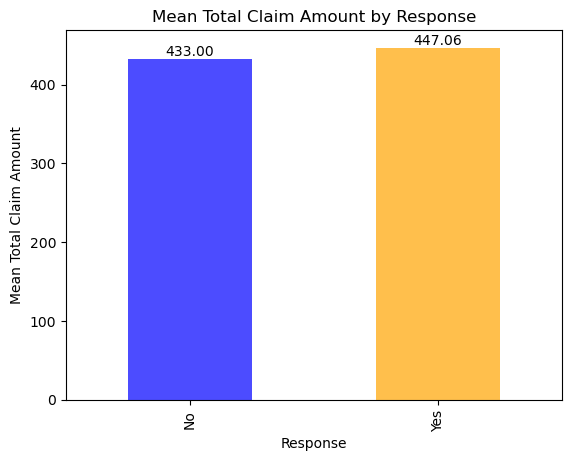

In [60]:
# Calculate the mean value of 'total_claim_amount' based on '_response'
mean_values = df.groupby('response')['total_claim_amount'].mean()

# Plotting the bar chart
ax = mean_values.plot(kind='bar', color=('blue', 'orange'), alpha=0.7)
for i, mean_value in enumerate(mean_values):
    ax.annotate(f'{mean_value:.2f}', xy=(i, mean_value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Response')
plt.ylabel('Mean Total Claim Amount')
plt.title('Mean Total Claim Amount by Response')

# Show the plot
plt.show()

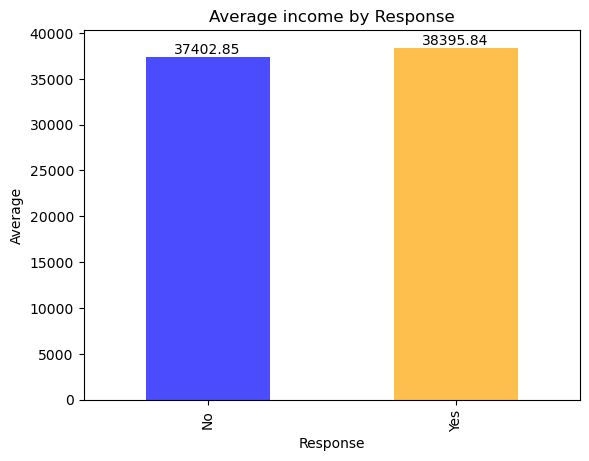

In [61]:
#Show a plot of the response rate by income.
# Calculate the mean value of 'total_claim_amount' based on '_response'
mean_values = df.groupby('response')['income'].mean()

# Plotting the bar chart
ax = mean_values.plot(kind='bar', color=('blue', 'orange'), alpha=0.7)
for i, mean_value in enumerate(mean_values):
    ax.annotate(f'{mean_value:.2f}', xy=(i, mean_value), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Response')
plt.ylabel('Average')
plt.title('Average income by Response')

# Show the plot
plt.show()

Based on resulting plot, can be concluded that non of chosen variables (Total claim amount, Income and Sales channel) affect the trend of responses to marketing compaign.